In [4]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
con = sqlite3.connect("final.db")
query = "select * from PROPERTIES"
properties = pd.read_sql_query(query, con)
salaries = pd.read_csv("salaries.csv")

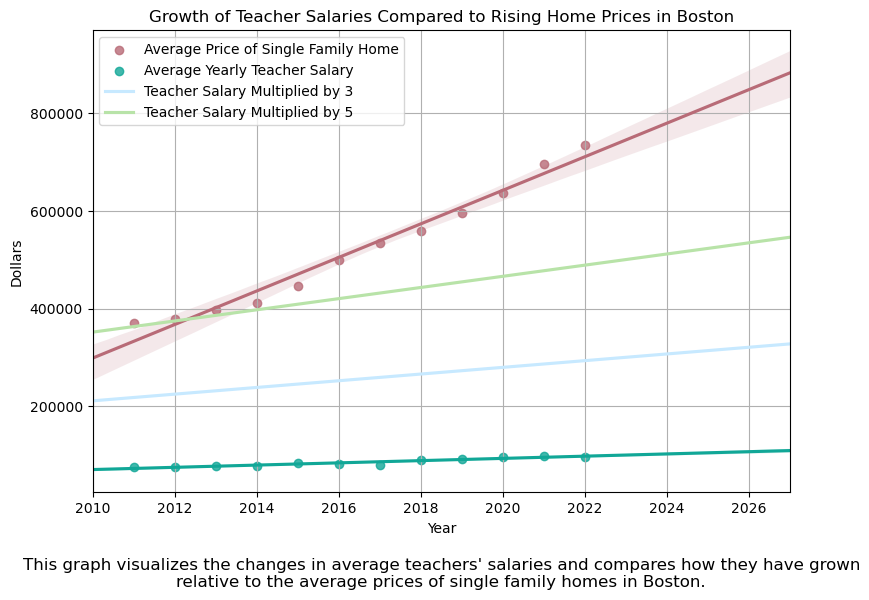

In [31]:
fig, ax = plt.subplots(figsize=(9,6))

# enables regression line to predict gap between home prices and teacher salary all the way to 2027
xlim = [2010,2027]
ax.set_xlim(xlim)

# creates a scatter plot with a regression line that continues past the last point
sns.regplot(x=properties.year, y=properties.average_home_value, truncate=False, label = "Average Price of Single Family Home", color = "#B86B77")
sns.regplot(x=salaries.year, y=salaries.average_earnings, truncate=False, label = "Average Yearly Teacher Salary", color='#11A797')
sns.regplot(x=salaries.year, y=salaries.average_earnings * 3, truncate=False, label = "Teacher Salary Multiplied by 3", color='#C7E9FF', ci=None, scatter=False)
sns.regplot(x=salaries.year, y=salaries.average_earnings * 5, truncate=False, label = "Teacher Salary Multiplied by 5", color='#B8E3A8', ci=None, scatter=False)
plt.ylabel("Dollars")
plt.xlabel("Year")
plt.legend()
plt.title('Growth of Teacher Salaries Compared to Rising Home Prices in Boston');
plt.grid()


caption = "This graph visualizes the changes in average teachers' salaries and compares how they have grown relative to the average prices of single family homes in Boston."
# https://stackoverflow.com/questions/34010205/adding-caption-below-x-axis-for-a-scatter-plot-using-matplotlib
ax.text(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12, transform=ax.transAxes)
plt.show()